# Experiment Workflow
Last updated on September 8, 2021.

Originally, this was a script for plotting the results of experiments. Now, it can also serve as a demonstration of experiment workflows.  
All the data used for the plotting is derived from the real experiment results stored in CSV files.

## Experiment for Subtask A

### Round 1: Grid Search
***Presentation: Highest Accuracy Matrix (5 epochs)***  

This section is used to present the experiment result of grid search on 4 different pretrained models (Bert-Base-Uncased, Distilbert-Base-Uncased, Roberta-Base and Roberta-Large). Since this is the first round of exploration, only 5 epochs are set to quickly locate a good range of learning rate and batch size. **After this round of grid search, the model and the hyperparameters with the highest accuracy will be chosen as the baseline for subsequent experiments.**  

**Original Grid Search Settings are:**  
Model: Bert-Base-Uncased, Distilbert-Base-Uncased, Roberta-Base  
Learning rate list: [1e-7,1e-6,1e-5,1e-4,1e-3,1e-2]  
Batch size list: [8,16,32,64,128,256]  
Epoch: 5

**Further experiment on Roberta-Large:**  
Comparing the performance of Bert-Base-Uncased model, Distilbert-Base-Uncased model and Roberta-Base model, the accuracy of Roberta-base model is the highest. So I did a further experiment on the Roberta-Large model. Since the Roberta-Large model is a fairly Large model, I narrowed down the range of grid search. The Hyperparameters Settings are as follows,  

Model: Roberta-Large  
Learning rate list: [1e-7,1e-6,1e-5,1e-4,1e-3]   
Batch size list: [8,16,32,64,128]  
Epoch: 5

**Conclution:**  
According to the 4 accuracy matrices, Roberta-Large model got the highest accuracy (0.947), with a learning rate of 1e-5 and a batch size of 128. Therefore, this model and hyperparameters were used as the baseline for subsequent experiments.

In [1]:
save_img_path = "./ExperimentResult_A/"

In [2]:
"""
Round 1: Grid Search
Presentation: Highest Accuracy Matrix (5 epochs)
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plot_accuracy_matrix(accuracy_matrix, model_name, xticks=None, yticks=None):
    plt.figure(figsize=(20, 6.5))
    plt.imshow(accuracy_matrix.transpose(),cmap='Blues')
    plt.tight_layout()
    
    maximum_value = np.max(accuracy_matrix)
    for i in range(accuracy_matrix.shape[0]):
        for j in range(accuracy_matrix.shape[1]):
            plt.text(i, j, '%s' % round(accuracy_matrix[i,j],3), ha='center', va= 'center',fontsize=14,  
                     color = "crimson" if accuracy_matrix[i,j] == maximum_value else "gray")

    plt.xlabel('Learning Rate',fontdict={'weight': 'normal', 'size': 15})
    plt.ylabel('Batch Size',fontdict={'weight': 'normal', 'size': 15})
    if len(accuracy_matrix) == 6:
        plt.xticks(list(range(6)),[1e-7,1e-6,1e-5,1e-4,1e-3,1e-2])
        plt.yticks(list(range(6)),[8,16,32,64,128,256])
    if len(accuracy_matrix) == 5:
        plt.xticks(list(range(5)),[1e-7,1e-6,1e-5,1e-4,1e-3])
        plt.yticks(list(range(5)),[8,16,32,64,128])
    plt.title("Highest Accuracy Matrix (5 epochs)\n%s" % model_name,fontdict={'weight': 'normal', 'size': 18})
    plt.savefig(save_img_path + "Round 1 - GridSearch - HighestAccuracyMatrix - %s.png" % model_name, bbox_inches='tight')
    plt.show()

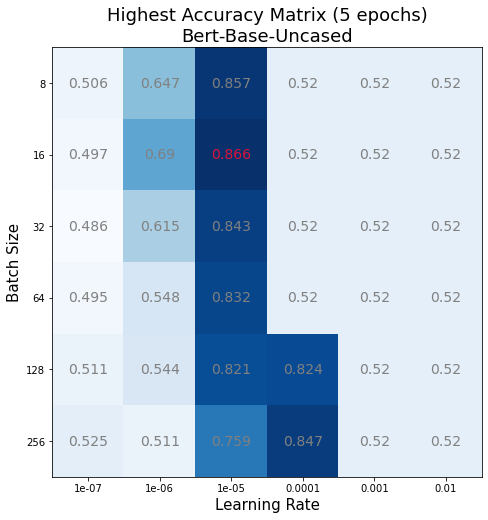

In [3]:
# Bert-Base-Uncased
data_path = "./ExperimentResult_A/Round1_GridSearch_Bert-Base-Uncased/Bert-Base-Uncased_Adam_CrossEntropy-Round1_GridSearch.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(6,6)

plot_accuracy_matrix(accuracy_matrix, "Bert-Base-Uncased")

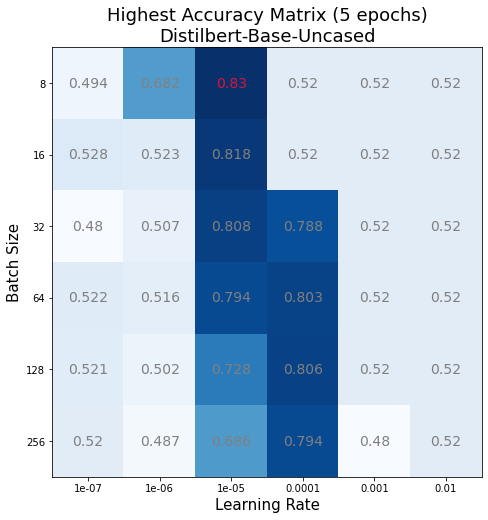

In [4]:
# Distilbert-Base-Uncased
data_path = "./ExperimentResult_A/Round1_GridSearch_Distilbert-Base-Uncased/Distilbert-Base-Uncased_Adam_CrossEntropy-Round1_GridSearch.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(6,6)

plot_accuracy_matrix(accuracy_matrix, "Distilbert-Base-Uncased")

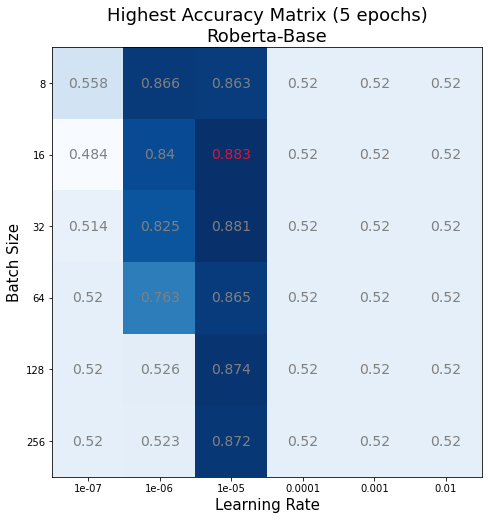

In [5]:
# Roberta-Base
data_path = "./ExperimentResult_A/Round1_GridSearch_Roberta-Base/Roberta-Base_Adam_CrossEntropy-Round1_GridSearch.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(6,6)

plot_accuracy_matrix(accuracy_matrix, "Roberta-Base")

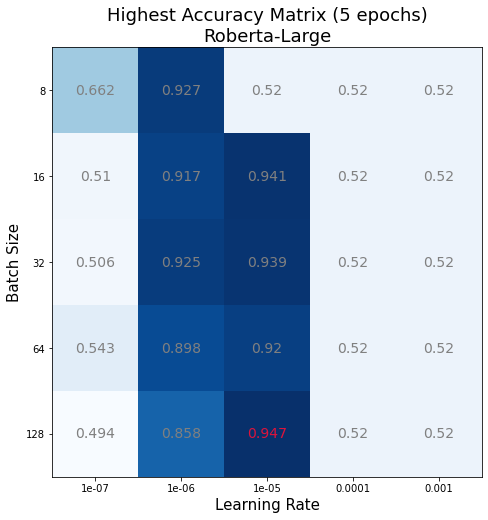

In [6]:
# Roberta-Large
data_path = "./ExperimentResult_A/Round1_GridSearch_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round1_GridSearch.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(5,5)

plot_accuracy_matrix(accuracy_matrix, "Roberta-Large")

### Round 2: Research on Epoch
***Presentation 1: Accuracy curves of different epochs***  
***Presentation 2: Compare Validation loss***  

**Search list of Epoch:**  
[5, 10, 15, 20, 30, 50]

In the 6 experiments on epoch, the validation loss no longer decreased but increased in the second, third, and fourth epochs (shown in Presentation 2). This means that the model has started to overfit. However, the highest accuracy on the validation dataset occurred in the epoch 4, 5, 12, 13, 9, and 21, **so I conservatively chose 15 epochs as the hyperparameter for subsequent experiment.**

   Test Epoch  Highest Accuracy  Occurred in which Epoch
0           5          0.933801                        4
1          10          0.939819                        5
2          15          0.948847                       12
3          20          0.940822                       13
4          30          0.939819                        9
5          50          0.943831                       21


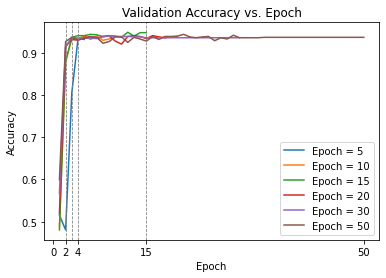

In [7]:
import json

'''
Round 2: Research on Epoch
Presentation 1: Accuracy curves of different epochs
'''

data_path = "./ExperimentResult_A/Round2_Epoch_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round2_Epoch.csv"
df_data = pd.read_csv(data_path, header=0)
print(df_data[["Test Epoch", "Highest Accuracy", "Occurred in which Epoch"]])

for index, row in df_data.iterrows():

    validation_accuracy = json.loads(row["Validation Accuracy"])
    
    # X-axis
    acc_X = np.arange(len(validation_accuracy))+1
    
#     # plot maximum point of validation accuracy
#     val_acc_max_point = (acc_X[np.argmax(validation_accuracy)], max(validation_accuracy))
#     plt.axvline(x=val_acc_max_point[0],  color='gray' , linestyle='--', linewidth=0.8)
#     plt.axhline(y=val_acc_max_point[1],  color='gray' , linestyle='--', linewidth=0.8)
#     plt.scatter(x=val_acc_max_point[0], y=val_acc_max_point[1], color="gray")
#     # plt.text(x=val_acc_max_point[0], y=val_acc_max_point[1], s=tuple([round(x,2) for x in val_acc_max_point]), ha="left", va="top")
#     plt.text(x=val_acc_max_point[0], y=val_acc_max_point[1], s=round(val_acc_max_point[1],2), ha="left", va="top")
    
    # plot curve
    plt.plot(acc_X, validation_accuracy,"-", label="Epoch = %s" % row["Test Epoch"])

plt.axvline(x=2,  color='gray' , linestyle='--', linewidth=0.8)
plt.axvline(x=3,  color='gray' , linestyle='--', linewidth=0.8)
plt.axvline(x=4,  color='gray' , linestyle='--', linewidth=0.8)
plt.axvline(x=15,  color='gray' , linestyle='--', linewidth=0.8)
plt.xticks([0,2,4,15,50])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy vs. Epoch")  
plt.legend()
plt.savefig(save_img_path + "Round 2 - Epoch - ValidationAccuracy vs Epoch.png", bbox_inches='tight')
plt.show()

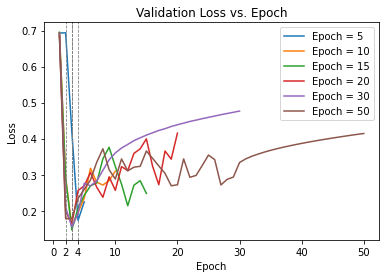

In [8]:
'''
Round 2: Research on Epoch
Presentation 2: Compare Validation Loss
'''
data_path = "./ExperimentResult_A/Round2_Epoch_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round2_Epoch.csv"
df_data = pd.read_csv(data_path, header=0)

for index, row in df_data.iterrows():   

    # train_loss_list = json.loads(row["Training Loss"])
    val_loss_list = json.loads(row["Validation Loss"])
    
    # X-axis
    # val_loss_X = (np.arange(len(val_loss_list))+1) * int(10000/row["Batch Size"])  # This is to adjust the X-axis of val_loss. For each epoch, we only get one val_loss, but have len(train_dataset)/batchsize train_loss. Meanwhile, we can deduce that len(train_dataset)/batchsize = len(train_loss_list)/epoch = len(train_loss_list)/len(val_loss_list)
    val_loss_X = np.arange(len(val_loss_list))+1
    
    # plot minimum point of validation loss
    epoch_of_min_loss = np.argmin(val_loss_list)
    val_loss_min_point = (val_loss_X[epoch_of_min_loss], min(val_loss_list))
    plt.axvline(x=val_loss_min_point[0],  color='gray' , linestyle='--', linewidth=0.8)
    # plt.axhline(y=val_loss_min_point[1],  color='gray' , linestyle='--', linewidth=0.8)
    # plt.text(x=val_loss_min_point[0]*1.05, y=val_loss_min_point[1]*0.9, s="epoch:%s" % (epoch_of_min_loss+1), va="bottom")
    
    # plot curve
    # plt.plot(train_loss_list, label="Training Loss")
    plt.plot(val_loss_X, val_loss_list,"-", label="Epoch = %s" % row["Test Epoch"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Validation Loss vs. Epoch")  
    plt.legend()

plt.xticks([0,2,4,10,20,30,40,50])
plt.savefig(save_img_path + "Round 2 - Epoch - ValidationLoss vs Epoch.png", bbox_inches='tight')
plt.show()

### Round 3: Research on Learning Rate
***Presentation 1: Accuracy vs. Learning Rate***  
***Presentation 2: Accuracy curves of different Learning Rate*** 

**Search list of Learning Rate:**  
[1E-7, 2E-7, 4E-7, 6E-7, 8E-7]  
[1E-6, 2E-6, 4E-6, 6E-6, 8E-6]  
[1E-5, 2E-5, 4E-5, 6E-5, 8E-5, 1E-4]

It can be observed from the figure that as the learning rate increases, the training speed becomes faster and faster. At the same time, the accuracy of the trained model has also been improved. However, when the learning rate is greater than 2E-5, the accuracy of the model oscillates around 0.5. This suggests that the model is not successfully trained, but is making random predictions. This situation occurs because the learning rate is too large, which leads to too much amplitude when update the model parameters. This may cause the optimal solution to be skipped, resulting in unsuccessful training. Therefore, we can draw such a conclusion: **when the learning rate is too small, the training speed is too slow. When the learning rate is too large, the training will fail.**

By comparing the successful training examples, it can be seen that when the learning rate was around 1E-5, the accuracy reached the highest value (about 0.94). Although the accuracy reached the highest value when the learning rate was 2E-5, it was found in the subsequent experiments that the model training of this learning rate was not stable. Sometimes an effective model can be successfully trained, but sometimes not. This indicates that the learning rate is high enough to reach a critical value. That's why it shows the instability of training. **Therefore, I chose 1E-5, which was a smaller test value than 2E-5, as the best learning rate.** At the same time, we can also see that when the learning rate was 1E-5, the accuracy was only slightly lower than that of 2E-5.

In [9]:
data_path = "./ExperimentResult_A/Round3_LearningRate_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round3_LearningRate.csv"
df_data = pd.read_csv(data_path, header=0)
print(df_data[["Learning Rate", "Batch Size", "Test Epoch", "Highest Accuracy"]])

    Learning Rate  Batch Size  Test Epoch  Highest Accuracy
0    1.000000e-07         128          15          0.509529
1    2.000000e-07         128          15          0.567703
2    4.000000e-07         128          15          0.856570
3    6.000000e-07         128          15          0.891675
4    8.000000e-07         128          15          0.900702
5    1.000000e-06         128          15          0.906720
6    2.000000e-06         128          15          0.929789
7    4.000000e-06         128          15          0.930792
8    6.000000e-06         128          15          0.937813
9    8.000000e-06         128          15          0.938816
10   1.000000e-05         128          15          0.939819
11   2.000000e-05         128          15          0.944835
12   4.000000e-05         128          15          0.519559
13   6.000000e-05         128          15          0.520562
14   8.000000e-05         128          15          0.519559
15   1.000000e-04         128          1

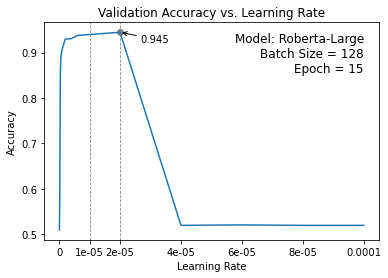

In [10]:
'''
Round 3: Research on Learning Rate
Presentation 1: Validation Accuracy vs. Learning Rate
'''

data_path = "./ExperimentResult_A/Round3_LearningRate_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round3_LearningRate.csv"
df_data = pd.read_csv(data_path, header=0)

highest_accuracy = df_data["Highest Accuracy"]
learning_rate = df_data["Learning Rate"]

# scale the X-axis (learning rate is too small to be the X-axis)
learning_rate_X = learning_rate*100

# plot curve
plt.plot(learning_rate_X, highest_accuracy,"-")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.xticks([0]+list(learning_rate_X)[-6:],[0]+list(learning_rate)[-6:])
plt.axvline(x=list(learning_rate_X)[-6],  color='gray' , linestyle='--', linewidth=0.8)
plt.title("Validation Accuracy vs. Learning Rate")  

# plot maximum point of validation accuracy
val_acc_max_point = (learning_rate_X[np.argmax(highest_accuracy)], max(highest_accuracy))
plt.axvline(x=val_acc_max_point[0],  color='gray' , linestyle='--', linewidth=0.8)
# plt.axhline(y=val_acc_max_point[1],  color='gray' , linestyle='--', linewidth=0.8)
plt.scatter(x=val_acc_max_point[0], y=val_acc_max_point[1], color="gray")
plt.annotate("%s" % round(max(highest_accuracy),3), xy=val_acc_max_point, 
             xytext=(20, -10), textcoords='offset points', arrowprops={'arrowstyle':'->'})

# add text
text = "Model: %s\nBatch Size = %s\nEpoch = %s" % (df_data["Model"][0],df_data["Batch Size"][0],df_data["Test Epoch"][0])
plt.text(x=list(learning_rate_X)[-1], y=max(highest_accuracy), s=text, 
         horizontalalignment="right", verticalalignment="top", fontsize=12) 

plt.savefig(save_img_path + "Round 3 - LearningRate - ValidationAccuracy vs LearningRate.png", bbox_inches='tight')
plt.show()

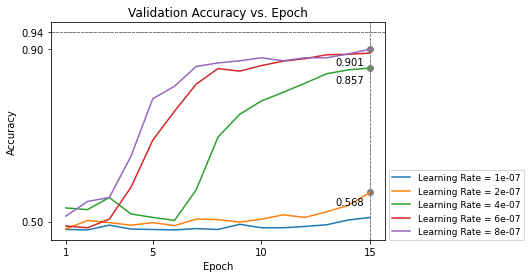

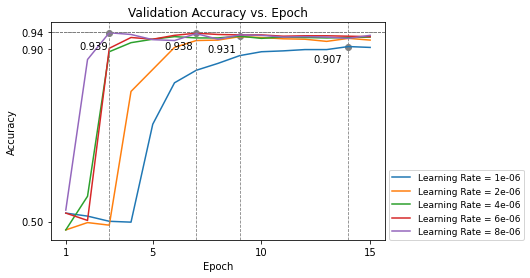

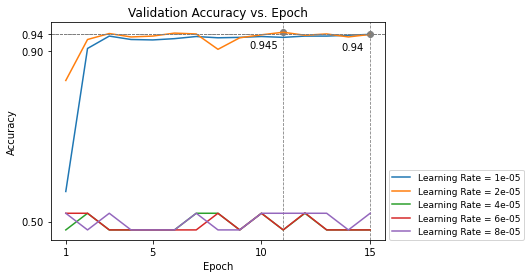

In [11]:
'''
Round 3: Research on Learning Rate
Presentation 2: Accuracy curves of different Learning Rate
'''
data_path = "./ExperimentResult_A/Round3_LearningRate_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round3_LearningRate.csv"
df_data = pd.read_csv(data_path, header=0)

highest_accuracy = max(df_data["Highest Accuracy"])
for index, row in df_data[:-1].iterrows():

    validation_accuracy = json.loads(row["Validation Accuracy"])
    
    # X-axis
    acc_X = np.arange(len(validation_accuracy))+1
    
    # plot maximum point of validation accuracy
    val_acc_max_point = (acc_X[np.argmax(validation_accuracy)], max(validation_accuracy))
    if val_acc_max_point[1] > 0.55 and index not in [3,6]:
        plt.axvline(x=val_acc_max_point[0],  color='gray' , linestyle='--', linewidth=0.8)
        # plt.axhline(y=val_acc_max_point[1],  color='gray' , linestyle='--', linewidth=0.8)
        plt.scatter(x=val_acc_max_point[0], y=val_acc_max_point[1], color="gray")
        # plt.text(x=val_acc_max_point[0]*0.98, y=val_acc_max_point[1]*1.05, s=tuple([round(x,2) for x in val_acc_max_point]), ha="right")
        plt.text(x=val_acc_max_point[0]*0.98, y=val_acc_max_point[1]*0.98, s=round(val_acc_max_point[1],3), ha="right", va="top")
    
    # plot curve
    plt.plot(acc_X, validation_accuracy,"-", label="Learning Rate = %s" % row["Learning Rate"])
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.xticks([1,5,10,15])
    plt.yticks([0.5,0.9,round(highest_accuracy,2)])
    plt.axhline(y=round(highest_accuracy,2), color='gray' , linestyle='--', linewidth=0.8)
    plt.title("Validation Accuracy vs. Epoch")  
    # plt.legend()
    plt.legend(loc=[1.01, 0], fontsize=9)
    if (index+1)%5==0:
        plt.savefig(save_img_path + "Round 3 - LearningRate - ValidationAccuracy vs Epoch 1%s.png" % str(row["Learning Rate"])[1:], 
                    bbox_inches='tight')
        plt.show()

### Round 4: Research on Batch Size
***Presentation 1: Accuracy vs. Batch Size***  
***Presentation 2: Validation Loss curves of different Batch Size***  
***Presentation 3: Accuracy curves of different Batch Size***  
***Presentation 4: Compare Training loss***  

**Search list of Batch Size:**  
[8, 16, 32, 64, 128] 

Conclusion:   
1.The smaller the batch size, the greater the fluctuation of training loss in each iteration. This is because there is less training data in each batch, which leads to more unstable training directions. (Based on Presentation 4)  
2.The larger the batch size, the faster the training loss decreases as the iteration progresses. Due to the increase of training data in each iteration, the training direction is more stable, and the training becomes more effective.
However, when it comes to epochs, the larger the batch size, the slower the training. The reason is that the number of iterations per epoch decreases as the batch size increases, which means that there is less opportunity for each epoch to update model parameters. (Compare Presentation 2 and Presentation 4)  
3.**128 was chosen as the best batch size** because it showed the best accuracy (in Presentation 1) and late overfitting (in Presentation 2).

In [12]:
data_path = "./ExperimentResult_A/Round4_BatchSize_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round4_BatchSize.csv"
df_data = pd.read_csv(data_path, header=0)
print(df_data[["Learning Rate", "Batch Size", "Test Epoch", "Highest Accuracy"]])

   Learning Rate  Batch Size  Test Epoch  Highest Accuracy
0        0.00001         128          15          0.945838
1        0.00001          64          15          0.945838
2        0.00001          32          15          0.941825
3        0.00001          16          15          0.935807
4        0.00001           8          15          0.519559


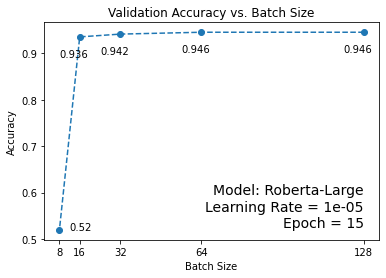

In [13]:
'''
Round 4: Research on Batch Size
Presentation 1: Accuracy vs. Batch Size
'''
# read experiment result
data_path = "./ExperimentResult_A/Round4_BatchSize_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round4_BatchSize.csv"
df_data = pd.read_csv(data_path, header=0)


highest_accuracy = df_data["Highest Accuracy"]
batch_size = df_data["Batch Size"]

# plot curve
plt.plot(batch_size, highest_accuracy, "o--")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.xticks(batch_size)
plt.title("Validation Accuracy vs. Batch Size")  

for x,y in zip(batch_size, highest_accuracy):
    if y > 0.8:
        plt.annotate("%s" % (round(y,3)), xy=(x,y), xytext=(-20, -20), textcoords='offset points')
    else:
        plt.annotate("%s" % (round(y,3)), xy=(x,y), xytext=(10, 0), textcoords='offset points')
    
# plot maximum point of validation accuracy
# val_acc_max_point = (batch_size[np.argmax(highest_accuracy)], max(highest_accuracy))
# plt.axvline(x=val_acc_max_point[0],  color='gray' , linestyle='--', linewidth=0.8)
# plt.axhline(y=val_acc_max_point[1],  color='gray' , linestyle='--', linewidth=0.8)
# plt.scatter(x=val_acc_max_point[0], y=val_acc_max_point[1], color="gray")
# plt.annotate("%s" % round(max(highest_accuracy),3), xy=val_acc_max_point, xytext=(20, -10), textcoords='offset points', arrowprops={'arrowstyle':'->'})

# add text
text = "Model: %s\nLearning Rate = %s\nEpoch = %s" % (df_data["Model"][0],df_data["Learning Rate"][0],df_data["Test Epoch"][0])
plt.text(x=list(batch_size)[0], y=min(highest_accuracy), s=text, horizontalalignment="right", verticalalignment="bottom", fontsize=14) 

plt.savefig(save_img_path + "Round 4 - BatchSize - ValidationAccuracy vs BatchSize.png", bbox_inches='tight')
plt.show()

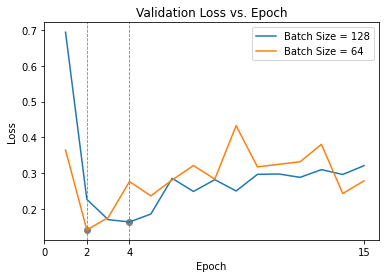

In [14]:
'''
Round 4: Research on Batch Size
Presentation 2: Compare Validation loss
'''
# read experiment result
data_path = "./ExperimentResult_A/Round4_BatchSize_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round4_BatchSize.csv"
df_data = pd.read_csv(data_path, header=0)

for index, row in df_data.iloc[[0,1,]].iterrows():   

    # train_loss_list = json.loads(row["Training Loss"])
    val_loss_list = json.loads(row["Validation Loss"])
    
    # X-axis
    # val_loss_X = (np.arange(len(val_loss_list))+1) * int(10000/row["Batch Size"])  # This is to adjust the X-axis of val_loss. For each epoch, we only get one val_loss, but have len(train_dataset)/batchsize train_loss. Meanwhile, we can deduce that len(train_dataset)/batchsize = len(train_loss_list)/epoch = len(train_loss_list)/len(val_loss_list)
    val_loss_X = np.arange(len(val_loss_list))+1
    
    # plot minimum point of validation loss
    if min(val_loss_list) < 0.6:
        epoch_of_min_loss = np.argmin(val_loss_list)
        val_loss_min_point = (val_loss_X[epoch_of_min_loss], min(val_loss_list))
        plt.scatter(x=val_loss_min_point[0], y=val_loss_min_point[1], color="gray")
        plt.axvline(x=val_loss_min_point[0],  color='gray' , linestyle='--', linewidth=0.8)
        # plt.axhline(y=val_loss_min_point[1],  color='gray' , linestyle='--', linewidth=0.8)
        # plt.text(x=val_loss_min_point[0]*1.05, y=val_loss_min_point[1]*0.9, s="epoch:%s" % (epoch_of_min_loss+1), va="bottom")
    
    # plot curve
    # plt.plot(train_loss_list, label="Training Loss")
    plt.plot(val_loss_X, val_loss_list,"-", label="Batch Size = %s" % row["Batch Size"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Validation Loss vs. Epoch")  
    plt.legend()

plt.xticks([0,2,4,15])
plt.savefig(save_img_path + "Round 4 - BatchSize - ValidationLoss vs Epoch.png", bbox_inches='tight')
plt.show()

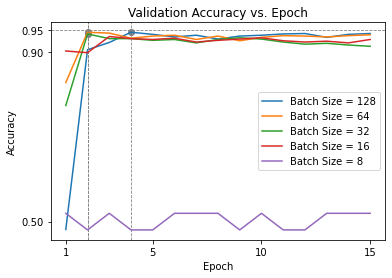

In [15]:
'''
Round 4: Research on Batch Size
Presentation 3: Accuracy curves of different Batch Size
'''

# read experiment result
data_path = "./ExperimentResult_A/Round4_BatchSize_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round4_BatchSize.csv"
df_data = pd.read_csv(data_path, header=0)

highest_accuracy = max(df_data["Highest Accuracy"])
for index, row in df_data[:].iterrows():

    validation_accuracy = json.loads(row["Validation Accuracy"])
    
    # X-axis
    acc_X = np.arange(len(validation_accuracy))+1
    
    # plot maximum point of validation accuracy
    val_acc_max_point = (acc_X[np.argmax(validation_accuracy)], max(validation_accuracy))
    if val_acc_max_point[1] > 0.55 and index not in [3,6]:
        plt.axvline(x=val_acc_max_point[0],  color='gray' , linestyle='--', linewidth=0.8)
        # plt.axhline(y=val_acc_max_point[1],  color='gray' , linestyle='--', linewidth=0.8)
        plt.scatter(x=val_acc_max_point[0], y=val_acc_max_point[1], color="gray")
        # plt.text(x=val_acc_max_point[0]*0.98, y=val_acc_max_point[1]*1.05, s=tuple([round(x,2) for x in val_acc_max_point]), ha="right")
        # plt.text(x=val_acc_max_point[0]*0.98, y=val_acc_max_point[1]*0.98, s=round(val_acc_max_point[1],3), ha="right", va="top")
    
    # plot curve
    plt.plot(acc_X, validation_accuracy,"-", label="Batch Size = %s" % row["Batch Size"])
    
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.axhline(y=round(highest_accuracy,2),  color='gray' , linestyle='--', linewidth=0.8)
plt.xticks([1,5,10,15])
plt.yticks([0.5,0.9,round(highest_accuracy,2)])
plt.title("Validation Accuracy vs. Epoch")  
plt.legend()
# plt.legend(loc=[1.01, 0], fontsize=11)
plt.savefig(save_img_path + "Round 4 - BatchSize - ValidationAccuracy vs Epoch.png", bbox_inches='tight')
plt.show()

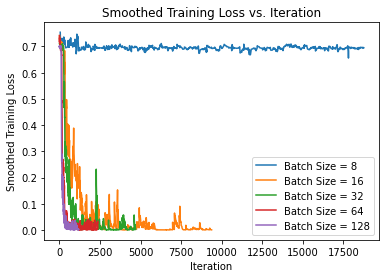

In [16]:
'''
Round 4: Research on Batch Size
Presentation 4: Compare Training loss
'''

# Smooth the curve like TensorBoard
def smooth(scalar_list, weight=0.85):
    last = scalar_list[0]
    smoothed_scalar_list = []
    for scalar in scalar_list:
        smoothed_scalar = last * weight + scalar * (1 - weight) 
        smoothed_scalar_list.append(smoothed_scalar)
        last = smoothed_scalar
    return smoothed_scalar_list


batch_size_list = [8,16,32,64,128]

for batch_size in batch_size_list:
    # read experiment result
    batch_size_path = "./ExperimentResult_A/Round4_BatchSize_fromTensorBoard/run-SubtaskA_Loss_Training_Roberta-Large_Adam_CrossEntropy_LearningRate=1e-05_BatchSize=%s_Epoch=15-tag-Loss.csv" % batch_size
    df_data = pd.read_csv(batch_size_path, header=0)

    iteration = df_data["Step"]
    train_loss = df_data["Value"]

    train_loss_smoothed = smooth(train_loss, weight=0.75)
    
    # plot curve
    # plt.plot(iteration, train_loss, "-", label="Batch Size = %s" % batch_size)
    plt.plot(iteration, train_loss_smoothed, "-", label="Batch Size = %s" % batch_size)
    plt.xlabel("Iteration")
    plt.ylabel("Smoothed Training Loss")
    plt.title("Smoothed Training Loss vs. Iteration")  

plt.legend()
plt.savefig(save_img_path + "Round 4 - BatchSize - SmoothedTrainingLoss vs Iteration.png", bbox_inches='tight')
plt.show()

Therefore, I set the final model and hyperparameters of subtask A as follows:

> model_name = "roberta-large"  
> optimizer_name = 'Adam'  
> learning_rate = 1e-5  
> batch_size = 128  
> epoch = 15  

## Experiment for Subtask B
Since the experiments of subtask A and subtask B are similar, I will write briefly in this section.

### Grid Search
***Presentation: Highest Accuracy Matrix (5 epochs)***  

The highest accuracy was when the model of Roberta-Large, batch size of 16 and learning rate of 1E-5.

In [17]:
save_img_pathB = "./ExperimentResult_B/"

In [18]:
"""
Round 1: Grid Search
Presentation: Highest Accuracy Matrix (5 epochs)
"""
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plot_accuracy_matrix(accuracy_matrix, model_name, xticks=None, yticks=None):
    plt.figure(figsize=(20, 6.5))
    plt.imshow(accuracy_matrix.transpose(),cmap='Blues')
    plt.tight_layout()
    
    maximum_value = np.max(accuracy_matrix)
    for i in range(accuracy_matrix.shape[0]):
        for j in range(accuracy_matrix.shape[1]):
            plt.text(i, j, '%s' % round(accuracy_matrix[i,j],3), ha='center', va= 'center',fontsize=14,  
                     color = "crimson" if accuracy_matrix[i,j] == maximum_value else "gray")

    plt.xlabel('Learning Rate',fontdict={'weight': 'normal', 'size': 15})
    plt.ylabel('Batch Size',fontdict={'weight': 'normal', 'size': 15})
    if model_name in ["Bert-Base-Uncased", "Roberta-Base"]:
        plt.xticks(list(range(4)),[1e-7,1e-6,1e-5,1e-4])
        plt.yticks(list(range(4)),[8,16,32,64])
    elif model_name == "Distilbert-Base-Uncased":
        plt.xticks(list(range(4)),[1e-7,1e-6,1e-5,1e-4])
        plt.yticks(list(range(5)),[8,16,32,64,128])        
    elif model_name == "Roberta-Large":
        plt.xticks(list(range(4)),[1e-7,1e-6,1e-5,1e-4])
        plt.yticks(list(range(2)),[8,16])
    plt.title("Highest Accuracy Matrix (5 epochs)\n%s" % model_name,fontdict={'weight': 'normal', 'size': 18})
    plt.savefig(save_img_pathB + "Round 1 - GridSearch - HighestAccuracyMatrix - %s.png" % model_name, bbox_inches='tight')
    plt.show()

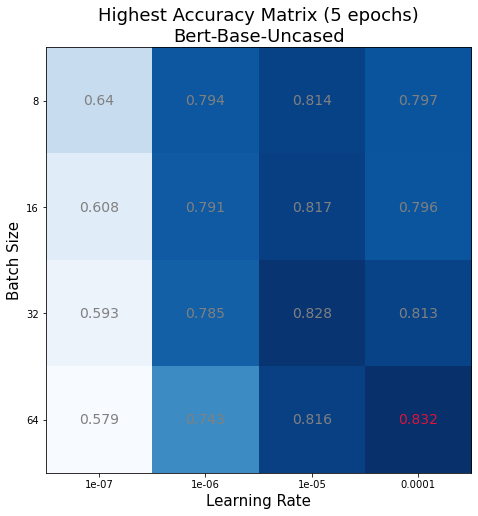

In [19]:
# Bert-Base-Uncased
data_path = "./ExperimentResult_B/Round1_GridSearch_Bert-Base-Uncased/Bert-Base-Uncased_Adam_CrossEntropy-Round1_GridSearch.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(4,4)

plot_accuracy_matrix(accuracy_matrix, "Bert-Base-Uncased")

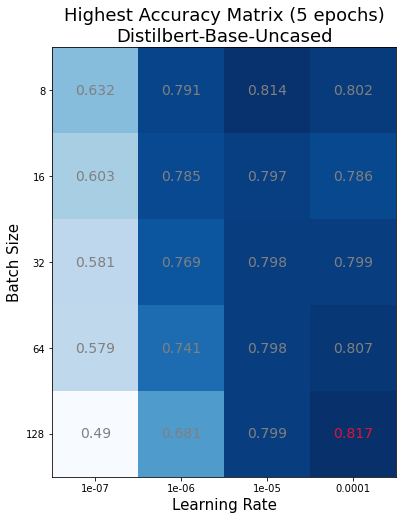

In [20]:
# Distilbert-Base-Uncased
data_path = "./ExperimentResult_B/Round1_GridSearch_Distilbert-Base-Uncased/Distilbert-Base-Uncased_Adam_CrossEntropy-Round1_GridSearch.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(4,5)

plot_accuracy_matrix(accuracy_matrix, "Distilbert-Base-Uncased")

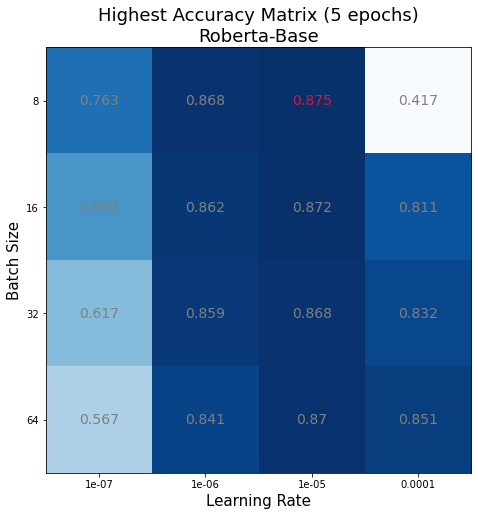

In [21]:
# Roberta-Base
data_path = "./ExperimentResult_B/Round1_GridSearch_Roberta-Base/Roberta-Base_Adam_CrossEntropy-Round1_GridSearch.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(4,4)

plot_accuracy_matrix(accuracy_matrix, "Roberta-Base")

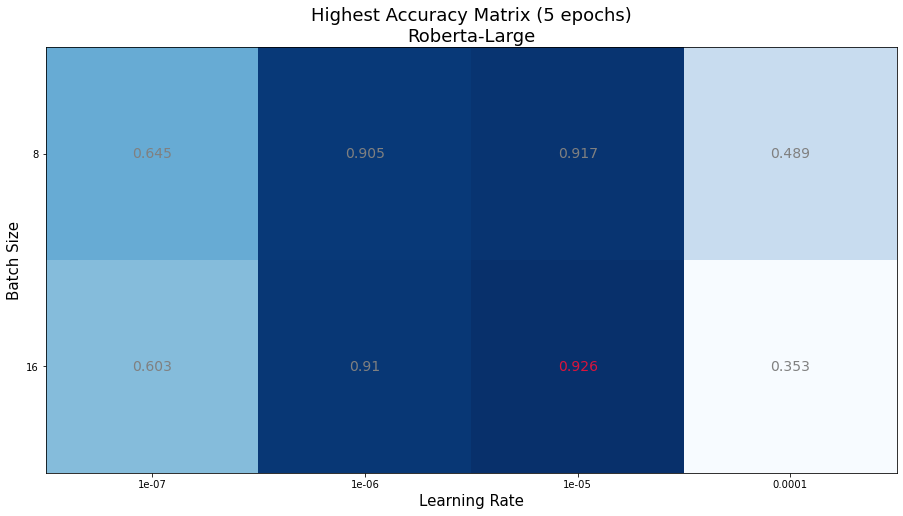

In [22]:
# Roberta-Large
data_path = "./ExperimentResult_B/Round1_GridSearch_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round1_GridSearch.csv"
data = pd.read_csv(data_path, header=0)
accuracy_matrix = np.array(data["Highest Accuracy"]).reshape(4,2)

plot_accuracy_matrix(accuracy_matrix, "Roberta-Large")

### Round 2: Research on Epoch

As the result shows, the highest accuracy for each experiment can achieve is around 91.9%, and they can get to this accuracy usually in 5 to 10 epochs (only the experiment of 30 epoch fails). **So I chose 10 as the final value of the hyperparameter epoch.**

   Test Epoch  Highest Accuracy  Occurred in which Epoch
0           5          0.912738                        3
1          10          0.919759                        2
2          15          0.919759                       10
3          20          0.925777                        5
4          30          0.919759                       12


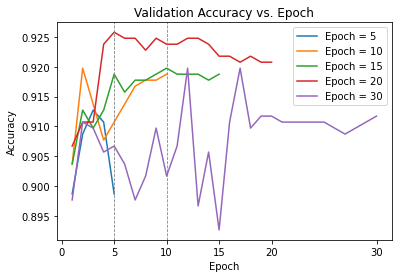

In [23]:
import json

'''
Round 2: Research on Epoch
Presentation 1: Accuracy curves of different epochs
'''

data_path = "./ExperimentResult_B/Round2_Epoch_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round2_Epoch.csv"
df_data = pd.read_csv(data_path, header=0)
print(df_data[["Test Epoch", "Highest Accuracy", "Occurred in which Epoch"]])

for index, row in df_data.iterrows():
    validation_accuracy = json.loads(row["Validation Accuracy"])
    
    # X-axis
    acc_X = np.arange(len(validation_accuracy))+1
    
#     # plot maximum point of validation accuracy
#     val_acc_max_point = (acc_X[np.argmax(validation_accuracy)], max(validation_accuracy))
#     plt.axvline(x=val_acc_max_point[0],  color='gray' , linestyle='--', linewidth=0.8)
#     plt.axhline(y=val_acc_max_point[1],  color='gray' , linestyle='--', linewidth=0.8)
#     plt.scatter(x=val_acc_max_point[0], y=val_acc_max_point[1], color="gray")
#     # plt.text(x=val_acc_max_point[0], y=val_acc_max_point[1], s=tuple([round(x,2) for x in val_acc_max_point]), ha="left", va="top")
#     plt.text(x=val_acc_max_point[0], y=val_acc_max_point[1], s=round(val_acc_max_point[1],2), ha="left", va="top")
    
    # plot curve
    plt.plot(acc_X, validation_accuracy,"-", label="Epoch = %s" % row["Test Epoch"])

# plt.axvline(x=2,  color='gray' , linestyle='--', linewidth=0.8)
# plt.axvline(x=3,  color='gray' , linestyle='--', linewidth=0.8)
plt.axvline(x=5,  color='gray' , linestyle='--', linewidth=0.8)
plt.axvline(x=10,  color='gray' , linestyle='--', linewidth=0.8)
plt.xticks([0,5,10,15,20,30])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy vs. Epoch")  
plt.legend()
plt.savefig(save_img_pathB + "Round 2 - Epoch - ValidationAccuracy vs Epoch.png", bbox_inches='tight')
plt.show()

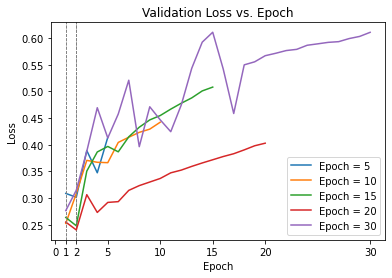

In [24]:
'''
Round 2: Research on Epoch
Presentation 2: Compare Validation Loss
'''
data_path = "./ExperimentResult_B/Round2_Epoch_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round2_Epoch.csv"
df_data = pd.read_csv(data_path, header=0)

for index, row in df_data.iterrows():   

    # train_loss_list = json.loads(row["Training Loss"])
    val_loss_list = json.loads(row["Validation Loss"])
    
    # X-axis
    # val_loss_X = (np.arange(len(val_loss_list))+1) * int(10000/row["Batch Size"])  # This is to adjust the X-axis of val_loss. For each epoch, we only get one val_loss, but have len(train_dataset)/batchsize train_loss. Meanwhile, we can deduce that len(train_dataset)/batchsize = len(train_loss_list)/epoch = len(train_loss_list)/len(val_loss_list)
    val_loss_X = np.arange(len(val_loss_list))+1
    
    # plot minimum point of validation loss
    epoch_of_min_loss = np.argmin(val_loss_list)
    val_loss_min_point = (val_loss_X[epoch_of_min_loss], min(val_loss_list))
    plt.axvline(x=val_loss_min_point[0],  color='gray' , linestyle='--', linewidth=0.8)
    # plt.axhline(y=val_loss_min_point[1],  color='gray' , linestyle='--', linewidth=0.8)
    # plt.text(x=val_loss_min_point[0]*1.05, y=val_loss_min_point[1]*0.9, s="epoch:%s" % (epoch_of_min_loss+1), va="bottom")
    
    # plot curve
    # plt.plot(train_loss_list, label="Training Loss")
    plt.plot(val_loss_X, val_loss_list,"-", label="Epoch = %s" % row["Test Epoch"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Validation Loss vs. Epoch")  
    plt.legend()

plt.xticks([0,1,2,5,10,15,20,30])
plt.savefig(save_img_pathB + "Round 2 - Epoch - ValidationLoss vs Epoch.png", bbox_inches='tight')
plt.show()

### Round 3: Research on Learning Rate
***Presentation 1: Accuracy vs. Learning Rate***  
***Presentation 2: Accuracy curves of different Learning Rate*** 

**Search list of Learning Rate:**  
[5E-7, 1E-6, 5E-6, 1E-5, 5E-5]  

1E-5 was selected because of its high accuracy and faster learning speed.

In [25]:
data_path = "./ExperimentResult_B/Round3_LearningRate_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round3_LearningRate.csv"
df_data = pd.read_csv(data_path, header=0)
print(df_data[["Learning Rate", "Batch Size", "Test Epoch", "Highest Accuracy"]])

   Learning Rate  Batch Size  Test Epoch  Highest Accuracy
0   1.000000e-07          16          10          0.810431
1   5.000000e-07          16          10          0.904714
2   1.000000e-06          16          10          0.897693
3   5.000000e-06          16          10          0.923771
4   1.000000e-05          16          10          0.923771
5   5.000000e-05          16          10          0.365095
6   1.000000e-04          16          10          0.471414


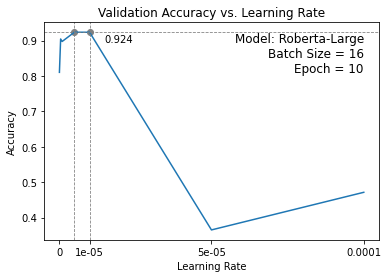

In [26]:
'''
Round 3: Research on Learning Rate
Presentation 1: Validation Accuracy vs. Learning Rate
'''

data_path = "./ExperimentResult_B/Round3_LearningRate_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round3_LearningRate.csv"
df_data = pd.read_csv(data_path, header=0)

highest_accuracy = df_data["Highest Accuracy"]
learning_rate = df_data["Learning Rate"]

# scale the X-axis (learning rate is too small to be the X-axis)
learning_rate_X = learning_rate*100

# plot curve
plt.plot(learning_rate_X, highest_accuracy,"-")
plt.xlabel("Learning Rate")
plt.ylabel("Accuracy")
plt.xticks([0]+list(learning_rate_X)[-3:],[0]+list(learning_rate)[-3:])
plt.axvline(x=list(learning_rate_X)[-3],  color='gray' , linestyle='--', linewidth=0.8)
plt.title("Validation Accuracy vs. Learning Rate")  

# plot maximum point of validation accuracy
val_acc_max_point = (learning_rate_X[np.argmax(highest_accuracy)], max(highest_accuracy))
plt.axvline(x=val_acc_max_point[0],  color='gray' , linestyle='--', linewidth=0.8)
plt.axhline(y=val_acc_max_point[1],  color='gray' , linestyle='--', linewidth=0.8)
plt.annotate("%s" % round(max(highest_accuracy),3), xy=val_acc_max_point, 
             xytext=(30, -10), textcoords='offset points')
for i in range(len(highest_accuracy)):
    if highest_accuracy[i] == max(highest_accuracy):
        plt.scatter(x=learning_rate_X[i], y=highest_accuracy[i], color="gray")
        

# add text
text = "Model: %s\nBatch Size = %s\nEpoch = %s" % (df_data["Model"][0],df_data["Batch Size"][0],df_data["Test Epoch"][0])
plt.text(x=list(learning_rate_X)[-1], y=max(highest_accuracy), s=text, 
         horizontalalignment="right", verticalalignment="top", fontsize=12) 

plt.savefig(save_img_pathB + "Round 3 - LearningRate - ValidationAccuracy vs LearningRate.png", bbox_inches='tight')
plt.show()

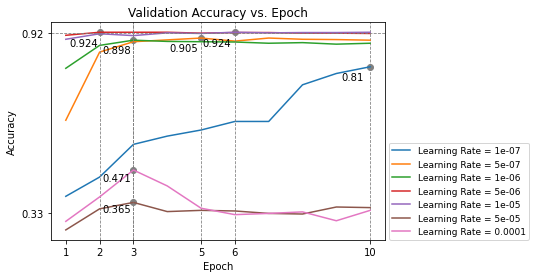

In [27]:
'''
Round 3: Research on Learning Rate
Presentation 2: Accuracy curves of different Learning Rate
'''
data_path = "./ExperimentResult_B/Round3_LearningRate_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round3_LearningRate.csv"
df_data = pd.read_csv(data_path, header=0)

highest_accuracy = max(df_data["Highest Accuracy"])
for index, row in df_data[:].iterrows():

    validation_accuracy = json.loads(row["Validation Accuracy"])
    
    # X-axis
    acc_X = np.arange(len(validation_accuracy))+1
    
    # plot maximum point of validation accuracy
    val_acc_max_point = (acc_X[np.argmax(validation_accuracy)], max(validation_accuracy))
#     if val_acc_max_point[1] > 0.55 and index not in [3,6]:
    if True:
        plt.axvline(x=val_acc_max_point[0],  color='gray' , linestyle='--', linewidth=0.8)
        # plt.axhline(y=val_acc_max_point[1],  color='gray' , linestyle='--', linewidth=0.8)
        plt.scatter(x=val_acc_max_point[0], y=val_acc_max_point[1], color="gray")
        # plt.text(x=val_acc_max_point[0]*0.98, y=val_acc_max_point[1]*1.05, s=tuple([round(x,2) for x in val_acc_max_point]), ha="right")
        plt.text(x=val_acc_max_point[0]*0.98, y=val_acc_max_point[1]*0.98, s=round(val_acc_max_point[1],3), ha="right", va="top")
    
    # plot curve
    plt.plot(acc_X, validation_accuracy,"-", label="Learning Rate = %s" % row["Learning Rate"])
    
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.xticks([1,2,3,5,6,10])
plt.yticks([0.33,round(highest_accuracy,2)])
plt.axhline(y=round(highest_accuracy,2), color='gray' , linestyle='--', linewidth=0.8)
plt.title("Validation Accuracy vs. Epoch")  
# plt.legend()
plt.legend(loc=[1.01, 0], fontsize=9)
plt.savefig(save_img_pathB + "Round 3 - LearningRate - ValidationAccuracy vs Epoch 1%s.png" % str(row["Learning Rate"])[1:], 
                bbox_inches='tight')
plt.show()

### Round 4: Research on Batch Size
***Presentation 1: Accuracy vs. Batch Size***  
***Presentation 2: Validation Loss curves of different Batch Size***  
***Presentation 3: Accuracy curves of different Batch Size***  
***Presentation 4: Compare Training loss***  

**Search list of Batch Size:**  
[4, 8, 16] 

16 was selected because of its higher validation accuracy and lower validation loss.

In [28]:
data_path = "./ExperimentResult_B/Round4_BatchSize_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round4_BatchSize.csv"
df_data = pd.read_csv(data_path, header=0)
print(df_data[["Learning Rate", "Batch Size", "Test Epoch", "Highest Accuracy"]])

   Learning Rate  Batch Size  Test Epoch  Highest Accuracy
0        0.00001           4          10          0.902708
1        0.00001           8          10          0.918756
2        0.00001          16          10          0.918756


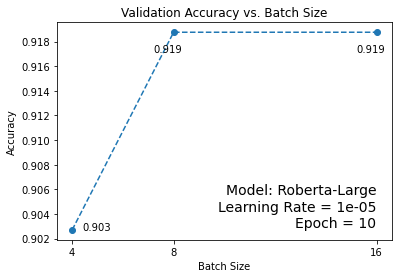

In [29]:
'''
Round 4: Research on Batch Size
Presentation 1: Accuracy vs. Batch Size
'''
# read experiment result
data_path = "./ExperimentResult_B/Round4_BatchSize_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round4_BatchSize.csv"
df_data = pd.read_csv(data_path, header=0)


highest_accuracy = df_data["Highest Accuracy"]
batch_size = df_data["Batch Size"]

# plot curve
plt.plot(batch_size, highest_accuracy, "o--")
plt.xlabel("Batch Size")
plt.ylabel("Accuracy")
plt.xticks(batch_size)
plt.title("Validation Accuracy vs. Batch Size")  

for x,y in zip(batch_size, highest_accuracy):
    if y > 0.91:
        plt.annotate("%s" % (round(y,3)), xy=(x,y), xytext=(-20, -20), textcoords='offset points')
    else:
        plt.annotate("%s" % (round(y,3)), xy=(x,y), xytext=(10, 0), textcoords='offset points')
    
# plot maximum point of validation accuracy
# val_acc_max_point = (batch_size[np.argmax(highest_accuracy)], max(highest_accuracy))
# plt.axvline(x=val_acc_max_point[0],  color='gray' , linestyle='--', linewidth=0.8)
# plt.axhline(y=val_acc_max_point[1],  color='gray' , linestyle='--', linewidth=0.8)
# plt.scatter(x=val_acc_max_point[0], y=val_acc_max_point[1], color="gray")
# plt.annotate("%s" % round(max(highest_accuracy),3), xy=val_acc_max_point, xytext=(20, -10), textcoords='offset points', arrowprops={'arrowstyle':'->'})

# add text
text = "Model: %s\nLearning Rate = %s\nEpoch = %s" % (df_data["Model"][0],df_data["Learning Rate"][0],df_data["Test Epoch"][0])
plt.text(x=list(batch_size)[-1], y=min(highest_accuracy), s=text, horizontalalignment="right", verticalalignment="bottom", fontsize=14) 

plt.savefig(save_img_pathB + "Round 4 - BatchSize - ValidationAccuracy vs BatchSize.png", bbox_inches='tight')
plt.show()

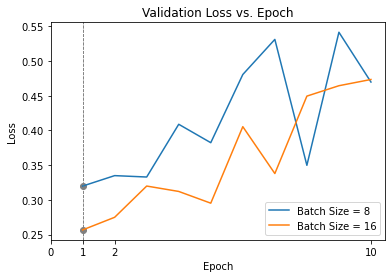

In [30]:
'''
Round 4: Research on Batch Size
Presentation 2: Compare Validation loss
'''
# read experiment result
data_path = "./ExperimentResult_B/Round4_BatchSize_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round4_BatchSize.csv"
df_data = pd.read_csv(data_path, header=0)

for index, row in df_data.iloc[[1,2]].iterrows():   

    # train_loss_list = json.loads(row["Training Loss"])
    val_loss_list = json.loads(row["Validation Loss"])
    
    # X-axis
    # val_loss_X = (np.arange(len(val_loss_list))+1) * int(10000/row["Batch Size"])  # This is to adjust the X-axis of val_loss. For each epoch, we only get one val_loss, but have len(train_dataset)/batchsize train_loss. Meanwhile, we can deduce that len(train_dataset)/batchsize = len(train_loss_list)/epoch = len(train_loss_list)/len(val_loss_list)
    val_loss_X = np.arange(len(val_loss_list))+1
    
    # plot minimum point of validation loss
    if min(val_loss_list) < 0.6:
        epoch_of_min_loss = np.argmin(val_loss_list)
        val_loss_min_point = (val_loss_X[epoch_of_min_loss], min(val_loss_list))
        plt.scatter(x=val_loss_min_point[0], y=val_loss_min_point[1], color="gray")
        plt.axvline(x=val_loss_min_point[0],  color='gray' , linestyle='--', linewidth=0.8)
        # plt.axhline(y=val_loss_min_point[1],  color='gray' , linestyle='--', linewidth=0.8)
        # plt.text(x=val_loss_min_point[0]*1.05, y=val_loss_min_point[1]*0.9, s="epoch:%s" % (epoch_of_min_loss+1), va="bottom")
    
    # plot curve
    # plt.plot(train_loss_list, label="Training Loss")
    plt.plot(val_loss_X, val_loss_list,"-", label="Batch Size = %s" % row["Batch Size"])
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.title("Validation Loss vs. Epoch")  
    plt.legend()

plt.xticks([0,1,2,10])
plt.savefig(save_img_pathB + "Round 4 - BatchSize - ValidationLoss vs Epoch.png", bbox_inches='tight')
plt.show()

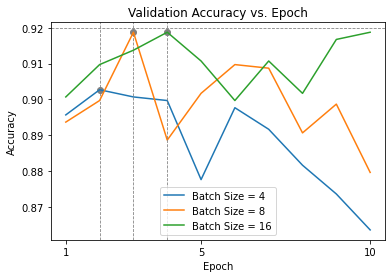

In [31]:
'''
Round 4: Research on Batch Size
Presentation 3: Accuracy curves of different Batch Size
'''

# read experiment result
data_path = "./ExperimentResult_B/Round4_BatchSize_Roberta-Large/Roberta-Large_Adam_CrossEntropy-Round4_BatchSize.csv"
df_data = pd.read_csv(data_path, header=0)

highest_accuracy = max(df_data["Highest Accuracy"])
for index, row in df_data[:].iterrows():

    validation_accuracy = json.loads(row["Validation Accuracy"])
    
    # X-axis
    acc_X = np.arange(len(validation_accuracy))+1
    
    # plot maximum point of validation accuracy
    val_acc_max_point = (acc_X[np.argmax(validation_accuracy)], max(validation_accuracy))
    if val_acc_max_point[1] > 0.55 and index not in [3,6]:
        plt.axvline(x=val_acc_max_point[0],  color='gray' , linestyle='--', linewidth=0.8)
        # plt.axhline(y=val_acc_max_point[1],  color='gray' , linestyle='--', linewidth=0.8)
        plt.scatter(x=val_acc_max_point[0], y=val_acc_max_point[1], color="gray")
        # plt.text(x=val_acc_max_point[0]*0.98, y=val_acc_max_point[1]*1.05, s=tuple([round(x,2) for x in val_acc_max_point]), ha="right")
        # plt.text(x=val_acc_max_point[0]*0.98, y=val_acc_max_point[1]*0.98, s=round(val_acc_max_point[1],3), ha="right", va="top")
    
    # plot curve
    plt.plot(acc_X, validation_accuracy,"-", label="Batch Size = %s" % row["Batch Size"])
    
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.axhline(y=round(highest_accuracy,2),  color='gray' , linestyle='--', linewidth=0.8)
plt.xticks([1,5,10])
# plt.yticks([0.5,0.9,round(highest_accuracy,2)])
plt.title("Validation Accuracy vs. Epoch")  
plt.legend()
# plt.legend(loc=[1.01, 0], fontsize=11)
plt.savefig(save_img_pathB + "Round 4 - BatchSize - ValidationAccuracy vs Epoch.png", bbox_inches='tight')
plt.show()

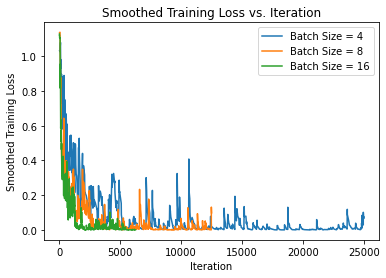

In [32]:
'''
Round 4: Research on Batch Size
Presentation 4: Compare Training loss
'''

# Smooth the curve like TensorBoard
def smooth(scalar_list, weight=0.85):
    last = scalar_list[0]
    smoothed_scalar_list = []
    for scalar in scalar_list:
        smoothed_scalar = last * weight + scalar * (1 - weight) 
        smoothed_scalar_list.append(smoothed_scalar)
        last = smoothed_scalar
    return smoothed_scalar_list


batch_size_list = [4,8,16]

for batch_size in batch_size_list:
    # read experiment result
    batch_size_path = "./ExperimentResult_B/Round4_BatchSize_fromTensorBoard/run-SubtaskB_Loss_Training_Roberta-Large_Adam_CrossEntropy_LearningRate=1e-05_BatchSize=%s_Epoch=10-tag-Loss.csv" % batch_size
    df_data = pd.read_csv(batch_size_path, header=0)

    iteration = df_data["Step"]
    train_loss = df_data["Value"]

    train_loss_smoothed = smooth(train_loss, weight=0.75)
    
    # plot curve
    # plt.plot(iteration, train_loss, "-", label="Batch Size = %s" % batch_size)
    plt.plot(iteration, train_loss_smoothed, "-", label="Batch Size = %s" % batch_size)
    plt.xlabel("Iteration")
    plt.ylabel("Smoothed Training Loss")
    plt.title("Smoothed Training Loss vs. Iteration")  

plt.legend()
plt.savefig(save_img_pathB + "Round 4 - BatchSize - SmoothedTrainingLoss vs Iteration.png", bbox_inches='tight')
plt.show()

Therefore, I set the final model and hyperparameters of subtask B as follows:

> model_name = "roberta-large"  
> optimizer_name = 'Adam'  
> learning_rate = 1e-5  
> batch_size = 16  
> epoch = 10  